# Information Retrieval  Assignment AIM -1 

## Group Members

### PARUPALLI SRINIVASA DINESH 2018AH04563
### SWETHA MUTHYALA 2018AH04509


# News Meta Search Engine

## Table of Contents
1. [Problem Statement](#section1)<br>
2. [News Extraction from a search engines](#section2)<br>
      - 2.1 [Import Packages](#section201)<br>
      - 2.2 [Approach Taken](#section202)<br>
      - 2.3 [Extract News from search engines](#section203)<br>
      - 2.5 [Extract News from search engines](#section204)<br>
3. [Aggregated News Collection](#section3)<br>
4. [Ranking](#section4)<br>
      - 4.1 [a) Approach 1](#section401)<br>      
      - 4.2 [b) Approach 2](#section402)<br> 
5. [Evaluation](#section5)<br>
      - 5.1 [For Sports Category - Precision](#section501)<br>
      - 5.2 [Plot the obtained results](#section502)<br> 
      - 5.3 [For Science Category - Precision](#section503)<br>  
      - 5.4 [Plot the obtained results](#section504)<br>  
6. [Assumptions and Conclusions](#section6)<br>  

 <a id=section1></a>
## 1. Problem Statement

Implement a simple meta search engine which produces aggregated
news which are extracted from any two news search engine like Google News and Yahoo!
News search engine. The purpose of this work is to understand the working principle of meta
search engine rather than focusing on effective meta search engine.


 <a id=section2></a>
## Task 1: News Extraction from a search engines

Assumptions

1) Ignore Image/Video search results. </br>

2) Choose any two category for the same purpose and choose any random date for extracting news for this task.



<a id=section201></a>
### Import Required Libraries 

In [283]:
!python -m spacy download en_core_web_sm 

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [284]:
import re
import string
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from urllib.request import urlopen, Request
import csv,os
from datetime import datetime
import matplotlib.pyplot as plt

<a id=section202></a>
### Approach Taken

Assumptions:

In this assignment, assume document content as only its summary/snippet, the title,
Category and date&time of the news for simplicity. It is to note clearly that based on
our assumption, document does not refer whole content. Thus, you need not retrieve
full document content (say complete article on a news) for this assignment. Only extract
summary/snippet, the title, Category and date&time of the news as a document content. </br>

**Note1: This assumption may not be true for the real meta search engine. This
assumption is to simplify the work.** </br>

**Note2: Ignore Image/Video search results.** </br>

**Note3: Choose any two category for the same purpose and choose any random date for
extracting news for this task.** </br>

**Propose a method suitable for processing and storing the extracted information from
different search engines** </br>




### Fixing the date filter, categories and search engines

1) Categories as Sports and Science with search queries  **cricket** for sports and **covid vaccine update** </br>

2) Choosen date as 2021-01-01 for Sports category, Choose 2021-01-04 for Science Category </br>

3) Search Engines considered are **Google news and Bing news**. 

**Areas of exploration considered for this task**:

4) Written a web scroller using spacy liberaries provided by python. This was providing lot of data to filter and due to   limitations crawlers have dropped that idea . </br>

b) Tried to do a web scrapping of google and bing search engines, but observed the few tags keep getting changed. </br>

c) After a lot of research decided to use the rss feed from the Google and Bing serach engines for this assignment to generate    a corpus. As per assignment assumptions for news extraction we need to date, description/summary, category and link. This      data is very much available for both the search engines and much cleaner approach.


d) For better visisbility can open .cvs (extratced news file) file using excel. </br>

e) For this assignment we have considered Sports and Science Cateogries. </br>

f) For Sports category date filter **Fri, 01 Jan 2021** is applied to extract news providing corpus in /Data/Sports folder. Results are valid for this date only </br> 

e) For Science category date filter **Mon, 04 Jan 2021** is applied to extract news providing corpus in /Data/Science folder. 
Results are valid for this date only </br> 

h) As we have considered the Rss news feed from Google and Bing for the data extraction purpose, running the ExtracNews method again will override the Data folder and results may vary as feed varies from date to date. 
Accordingly RankedDocuments.txt should be constructed manually.


#### Global Variables

In [285]:
#def loadconfig():   
categories = ["Sports", "Science"]
searchsites = ["googlenews","bingnews"] 

# user query 
userquery1 ='cricket'
userquery2 = 'Vaccine'

In [286]:
def Getdatefilter():
    today = datetime(2021, 1, 1) 
    dt = today.strftime("%a") +', '+ today.strftime("%d") + ' '+today.strftime("%b") +' '+today.strftime("%Y")
    print('----------------------News Extraction for Date : ' +dt+'---------------------------------')
    return dt

In [287]:
datefilter = Getdatefilter()
print(datefilter)

----------------------News Extraction for Date : Fri, 01 Jan 2021---------------------------------
Fri, 01 Jan 2021


<a id=section203></a>
### Extract News from search engines

Extracting news based on date, category and search filter as suggested in assignment description.


### Extract news based on category and search query

In [288]:
def ExtractNews(datefilter,category,query,searchsite,url):
    serachstring= category+'+'+query
    news_url = url.format(serachstring)

    print('\n-----News feed url for google news : ' +news_url+'-------')
    
    Client=urlopen(news_url)
    xml_page=Client.read()
    Client.close()
   
    soup_page=BeautifulSoup(xml_page,"xml")
    news_list=soup_page.findAll("item")

    # Print news title, url and publish date
    file = open('Data/'+category+'/'+searchsite+'_'+category+'.csv', 'w', newline ='', encoding='utf-8') 
    header = ['Title', 'Description' ,'Category', 'Link', 'DateTime']
    writer = csv.DictWriter(file, fieldnames = header)
    writer.writeheader() 
    with file:
        for news in news_list:
            if(datefilter in news.pubDate.text):
                extracteddt=news.pubDate.text[5:-4]
                date_time_obj = datetime.strptime(extracteddt, '%d %b %Y %H:%M:%S')
                soup = BeautifulSoup(news.description.text)
                description = soup.get_text()
                writer.writerow({'Title' : news.title.text,
                 'Description': description,
                 'Category': category,  
                 'Link': news.link.text,
                 'DateTime': date_time_obj})


#### Calling ExtractNews method to fetch the news feed for Sports Category and Cricket query for Google news

In [289]:
# calling extractgooglenews method to fetch the news feed for Sports Category and Cricket query 

print('---------------------Category : '+categories[0]+'--------------------')
print('---------------------Query : '+userquery1+'--------------------')
ExtractNews(datefilter,categories[0],
            userquery1,
            searchsites[0],'https://news.google.com/rss/search?q={}**&hl=en-US&gl=US&ceid=US:en')


---------------------Category : Sports--------------------
---------------------Query : cricket--------------------

-----News feed url for google news : https://news.google.com/rss/search?q=Sports+cricket**&hl=en-US&gl=US&ceid=US:en-------


#### Calling ExtractNews method to fetch the news feed for Science Category and Vaccine query for Google news 

In [290]:
# calling extractgooglenews method to fetch the news feed for Science Category and Covid Vaccine update query 

print('---------------------Category : '+categories[1]+'--------------------')
print('---------------------Query : '+userquery2+'--------------------')

ExtractNews('Mon, 04 Jan 2021',categories[1],
            userquery2,
            searchsites[0],'https://news.google.com/rss/search?q={}**&hl=en-US&gl=US&ceid=US:en')



---------------------Category : Science--------------------
---------------------Query : Vaccine--------------------

-----News feed url for google news : https://news.google.com/rss/search?q=Science+Vaccine**&hl=en-US&gl=US&ceid=US:en-------


#### Calling ExtractNews method to fetch the news feed for Sports Category and Cricket query for Bing news

In [291]:
# calling extractgooglenews method to fetch the news feed for Sports Category and Cricket query 

print('---------------------Category : '+categories[0]+'--------------------')
print('---------------------Query : '+userquery1+'--------------------')

ExtractNews(datefilter,categories[0],
            userquery1,
            searchsites[1],'https://www.bing.com/news/search?q={}&format=rss')

---------------------Category : Sports--------------------
---------------------Query : cricket--------------------

-----News feed url for google news : https://www.bing.com/news/search?q=Sports+cricket&format=rss-------


#### Calling ExtractNews method to fetch the news feed for Science Category and Vaccine query for Bing news 

In [292]:
# calling extractgooglenews method to fetch the news feed for Science Category and Covid Vaccine update query 

datefilter='Mon, 04 Jan 2021'

print('---------------------Category : '+categories[1]+'--------------------')
print('---------------------Query : '+userquery2+'--------------------')

ExtractNews(datefilter,categories[1],
            userquery2,
            searchsites[1],'https://www.bing.com/news/search?q={}&format=rss')

---------------------Category : Science--------------------
---------------------Query : Vaccine--------------------

-----News feed url for google news : https://www.bing.com/news/search?q=Science+Vaccine&format=rss-------


 <a id=section3></a>
# Task 2: Aggregated News Collection


Assumptions to pick unique news documents.

-- To maggregare extracted news, check for unique documents based on title. Remove the duplicate documents if any found with same title in both the data collection.

In [293]:
# Merging the extracted news from google news and bing news for a given category+searchquery and store in Data/Sports folder
# Remove the duplicates based on the unique titles in both the document collection

def Aggregatenews(category,searchsites,encodingtype):
    path ='Data/'+category+'/'
    #Read from google news.csv file based on catgegory
    
    google_sports_df = pd.read_csv(path+searchsites[0]+'_'+category+'.csv',sep=",", encoding=encodingtype)
    google_sports_df.head()
    
    #Read from bing news.csv file based on catgegory
    
    bing_sports_df = pd.read_csv(path+searchsites[1]+'_'+category+'.csv',sep=",", encoding=encodingtype)
    
    google_sports_df['Title'] = google_sports_df['Title'].astype(str).str.lower()
    bing_sports_df['Title'] = bing_sports_df['Title'].astype(str).str.lower()
    
    #Remove duplicate documents based on title comaprision between both news collection 
    
    for index, row in google_sports_df.iterrows():    
        if row['Title'].lower() in bing_sports_df['Title'].values:
            bing_sports_df = bing_sports_df.drop(bing_sports_df[bing_sports_df['Title']==0].index)
            
    return google_sports_df.append(bing_sports_df)

### Aggregating news for Sports Category 

In [294]:
#Store the aggegarted in documents from bing and google search eninges into a single file calles uniquenews .csv document
# Sort the news by datetime so that it will be easy to rank consider latest news with higher rank

uniquenews_df=Aggregatenews(categories[0],searchsites,'cp1252').sort_values(by=['DateTime'])
print("-----------------------Save the unique documents into a file------------------------")
uniquenews_df.to_csv('Data/'+categories[0]+'/uniquenews.csv', index = False, header=True)



print("-----------------------Fetch the unique documents from file to index------------------------")

df_sports = pd.read_csv('Data/'+categories[0]+'/uniquenews.csv',sep=",")
df_sports=df_sports.reset_index()
df_sports=df_sports.drop(['index'],axis=1)
df_sports.head(5)

-----------------------Save the unique documents into a file------------------------
-----------------------Fetch the unique documents from file to index------------------------


,Title,Description,Category,link,DateTime
0,chance to right-size after pandemic pause - hi...,Chance to right-size after pandemic pause Hin...,Sports,https://www.hindustantimes.com/cricket/chance-...,2021-01-01 02:36:36
1,billionaire jeff bezos’s xmas bonus for cricke...,Billionaire Jeff Bezos’s Xmas bonus for cricke...,Sports,https://www.theaustralian.com.au/sport/cricket...,2021-01-01 02:37:00
2,new zealand skipper sophie devine takes diabet...,New Zealand skipper Sophie Devine takes diabet...,Sports,https://www.hindustantimes.com/cricket/new-zea...,2021-01-01 02:56:58
3,ms dhoni to suresh raina: indian cricketers wh...,MS Dhoni to Suresh Raina: Indian cricketers wh...,Sports,https://www.timesnownews.com/sports/cricket/ar...,2021-01-01 03:47:00
4,ren vs st bbl dream11 prediction today: fantas...,REN vs ST BBL Dream11 Prediction Today: Fantas...,Sports,https://www.timesnownews.com/sports/cricket/ar...,2021-01-01 05:25:57


### Aggregating news for Science Category 

In [295]:
#Store the aggegarted in documents from bing and google search eninges into a single file calles uniquenews .csv document
# Sort the news by datetime so that it will be easy to rank consider latest news with higher rank

uniquenews_df=Aggregatenews(categories[1],searchsites,'utf-8').sort_values(by=['DateTime'])
print("-----------------------Save the unique documents into a file------------------------")
uniquenews_df.to_csv('Data/'+categories[1]+'/uniquenews.csv', index = False, header=True)



print("-----------------------Fetch the unique documents from file to index------------------------")

df_science = pd.read_csv('Data/'+categories[1]+'/uniquenews.csv',sep=",")
df_science=df_science.reset_index()
df_science=df_science.drop(['index'],axis=1)
df_science.head(5)

-----------------------Save the unique documents into a file------------------------
-----------------------Fetch the unique documents from file to index------------------------


,Title,Description,Category,Link,DateTime
0,"uk rolls out astrazeneca vaccine, hails lead i...","UK rolls out AstraZeneca vaccine, hails lead i...",Science,https://uk.reuters.com/article/health-coronavi...,2021-01-04 00:05:00
1,"uk rolls out astrazeneca vaccine, touts britis...",Britain began vaccinating its population on Mo...,Science,http://www.bing.com/news/apiclick.aspx?ref=Fex...,2021-01-04 00:36:00
2,india’s emergency approval to 2 covid vaccines...,"In a Facebook post, Vice President Naidu said ...",Science,http://www.bing.com/news/apiclick.aspx?ref=Fex...,2021-01-04 01:09:00
3,"covid-19 is dangerous, not vaccines -- 20 scie...","Covid-19 Is Dangerous, Not Vaccines -- 20 Scie...",Science,https://codeblue.galencentre.org/2021/01/04/co...,2021-01-04 02:06:38
4,"india's covid vaccine is a leap of science, sa...",Vice President of India and Chairman of Rajya ...,Science,http://www.bing.com/news/apiclick.aspx?ref=Fex...,2021-01-04 04:03:00


 <a id=section4></a>
# Task 3 Ranking 

<a id=section401></a>
### a) Approach 1
Assumptions made while ranking

#### Aggregated news sorted by datetime to rank latest news as highest rank 

As an observation we havent find default ranking provided by the google or bing news search engine. So made an assumption after manual evalaution to consider latest news as highest rank. 

Example least rank starting from 1 to number of documents in collection.

In [296]:
#Rank the document and generate doucmentId after ranking

def Rankdocument(df):
    df['Rank'] = range(1, len(df) + 1)
    df['DocumentId'] = range(1, len(df) + 1)
    
    #Generatign document ID 
    df['DocumentId'] = 'Doc ' + df['DocumentId'].astype(str)
    return df

# For sports Category
df_sports = Rankdocument(df_sports)

# For Science Category
df_science = Rankdocument(df_science)

In [297]:
df_sports.head()

,Title,Description,Category,link,DateTime,Rank,DocumentId
0,chance to right-size after pandemic pause - hi...,Chance to right-size after pandemic pause Hin...,Sports,https://www.hindustantimes.com/cricket/chance-...,2021-01-01 02:36:36,1,Doc 1
1,billionaire jeff bezos’s xmas bonus for cricke...,Billionaire Jeff Bezos’s Xmas bonus for cricke...,Sports,https://www.theaustralian.com.au/sport/cricket...,2021-01-01 02:37:00,2,Doc 2
2,new zealand skipper sophie devine takes diabet...,New Zealand skipper Sophie Devine takes diabet...,Sports,https://www.hindustantimes.com/cricket/new-zea...,2021-01-01 02:56:58,3,Doc 3
3,ms dhoni to suresh raina: indian cricketers wh...,MS Dhoni to Suresh Raina: Indian cricketers wh...,Sports,https://www.timesnownews.com/sports/cricket/ar...,2021-01-01 03:47:00,4,Doc 4
4,ren vs st bbl dream11 prediction today: fantas...,REN vs ST BBL Dream11 Prediction Today: Fantas...,Sports,https://www.timesnownews.com/sports/cricket/ar...,2021-01-01 05:25:57,5,Doc 5


In [298]:
df_science.head()

,Title,Description,Category,Link,DateTime,Rank,DocumentId
0,"uk rolls out astrazeneca vaccine, hails lead i...","UK rolls out AstraZeneca vaccine, hails lead i...",Science,https://uk.reuters.com/article/health-coronavi...,2021-01-04 00:05:00,1,Doc 1
1,"uk rolls out astrazeneca vaccine, touts britis...",Britain began vaccinating its population on Mo...,Science,http://www.bing.com/news/apiclick.aspx?ref=Fex...,2021-01-04 00:36:00,2,Doc 2
2,india’s emergency approval to 2 covid vaccines...,"In a Facebook post, Vice President Naidu said ...",Science,http://www.bing.com/news/apiclick.aspx?ref=Fex...,2021-01-04 01:09:00,3,Doc 3
3,"covid-19 is dangerous, not vaccines -- 20 scie...","Covid-19 Is Dangerous, Not Vaccines -- 20 Scie...",Science,https://codeblue.galencentre.org/2021/01/04/co...,2021-01-04 02:06:38,4,Doc 4
4,"india's covid vaccine is a leap of science, sa...",Vice President of India and Chairman of Rajya ...,Science,http://www.bing.com/news/apiclick.aspx?ref=Fex...,2021-01-04 04:03:00,5,Doc 5


In [299]:
def StoreApproach1Results(df,category): 
    selected_df = df[['Description','DateTime','Rank','DocumentId']]
    selected_df.to_csv('Data/'+category+'/Rank/ResultantRanks_A1.txt', header=['Description','DateTime','Rank','DocumentId'], index=None, sep=',')
    print('----Saved ResultantRanks_A1.txt file for '+ category+' Category-----')


 # For Sports Category    
StoreApproach1Results(df_sports,categories[0]) 


# For Science Category
StoreApproach1Results(df_science,categories[1])


----Saved ResultantRanks_A1.txt file for Sports Category-----
----Saved ResultantRanks_A1.txt file for Science Category-----


<a id=section402></a>
### b) Approach 2

Assumptions made while ranking

**Used TF-IDF aproach along with Cosine similary to rank the documents** </br>


TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Need to do some **Text Preprocessing** before we proceed to compute TF-IDF

Below listed pre-processing steps we’ll be performing on documents: Considered only Description column from the dataset for text processing.

Documents:

    Lowercase the text 
    
    Expand Contractions
    
    Clean the text
    
    Remove Stopwords
    
    Lemmatize words


 ### Lowercase the text 

In [300]:
def ToLowerCase(df):
    df["Title"] = df["Title"].str.lower()
    df["Description"] = df["Description"].str.lower()    
    return df

#For Sports cateogry
df_sports = ToLowerCase(df_sports)

#For Science cateogry
df_science = ToLowerCase(df_science)

### Expand Contractions

In [301]:
# Dictionary of english Contractions


contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not","can't": "can not","can't've": "cannot have",
"'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have",
"didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have",
"hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will",
"he'll've": "he will have","how'd": "how did","how'd'y": "how do you","how'll": "how will","i'd": "i would",
"i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have",
"isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have",
"let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have",
"needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
"shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will",
"she'll've": "she will have","should've": "should have","shouldn't": "should not",
"shouldn't've": "should not have","so've": "so have","that'd": "that would","that'd've": "that would have",
"there'd": "there would","there'd've": "there would have",
"they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have",
"they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we would",
"we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have",
"weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are",
"what've": "what have","when've": "when have","where'd": "where did",
"where've": "where have","who'll": "who will","who'll've": "who will have","who've": "who have",
"why've": "why have","will've": "will have","won't": "will not","won't've": "will not have",
"would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all",
"y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
"you'd": "you would","you'd've": "you would have","you'll": "you will","you'll've": "you will have",
"you're": "you are","you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [302]:
# Expanding Contractions

#  For  Sports Category
df_sports['Title']=df_sports['Title'].apply(lambda x:expand_contractions(x))
df_sports['Description']=df_sports['Description'].apply(lambda x:expand_contractions(x))


#For Science Category

df_science['Title']=df_science['Title'].apply(lambda x:expand_contractions(x))
df_science['Description']=df_science['Description'].apply(lambda x:expand_contractions(x))


### Clean the text

In [303]:
# Function for Cleaning Text
def clean_text(text):
    text=re.sub('\w*\d\w*','', text)
    text=re.sub('\n',' ',text)
    text=re.sub(r"http\S+", "", text)
    text=re.sub('[^a-z]',' ',text)
    return text
 
# Cleaning tetx for Sports Category
df_sports['Title']=df_sports['Title'].apply(lambda x:clean_text(x))
df_sports['Description']=df_sports['Description'].apply(lambda x:clean_text(x))
#df_sports.head(4)    

# Cleaning tetx for Science Category
df_science['Title']=df_science['Title'].apply(lambda x:clean_text(x))
df_science['Description']=df_science['Description'].apply(lambda x:clean_text(x))
#df_science.head(4)   

Previously, we replaced many things with blank spaces. This will create extra empty spaces between two words. Therefore, we’ll reduce the number of spaces to one.

In [304]:
# Removing extra spaces

# For Sports Category
df_sports['Title']=df_sports['Title'].apply(lambda x: re.sub(' +',' ',x))
df_sports['Description']=df_sports['Description'].apply(lambda x: re.sub(' +',' ',x))


# For Science Category
df_science['Title']=df_science['Title'].apply(lambda x: re.sub(' +',' ',x))
df_science['Description']=df_science['Description'].apply(lambda x: re.sub(' +',' ',x))

In [305]:
# Stopwords removal & Lemmatizing tokens using SpaCy
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

def Lemmatization(df):
# Removing Stopwords and Lemmatizing words
    df['lemmatizedtitle']=df['Title'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
    df['lemmatizeddescription']=df['Description'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
    return df

df_sports =Lemmatization(df_sports)

df_science =Lemmatization(df_science)


In [306]:
#news_list = df_sports["lemmatizeddescription"]


### Create Term-Document Matrix with TF-IDF weighting

In [307]:
#Takes the list of documents on which need to construct the vocabulary. Returns the vocabulary indexed dataframe.

vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

def tfidfweighting(news_list): 
    # Instantiate a TfidfVectorizer object
    news_list.head(10)
    # It fits the data and transform it as a vector
    X = vectorizer.fit_transform(news_list)
    # Convert the X as transposed matrix
    X = X.T.toarray()
    # Create a DataFrame and set the vocabulary as the index
    df_vocbIndex = pd.DataFrame(X, index=vectorizer.get_feature_names())
    print(df_vocbIndex.head())
    print(df_vocbIndex.shape)
    return df_vocbIndex

 
## Calling method for Sports cataegory
newslist_sports = df_sports["lemmatizeddescription"]
df_sportsvocbIndex = tfidfweighting(newslist_sports)
print('-------------------TF-IDF for Sports Cateogry ---------------------')
 
## Calling method for Science cataegory
#newslist_science = df_science["lemmatizeddescription"]
#df_sciencevocbIndex = tfidfweighting(newslist_science)
#print('-------------------TF-IDF for Science Cateogry -------------------')

           0    1    2    3    4    5    6    7    8    9   ...   26  \
aakash    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
action    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
activity  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
africa    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
ahead     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

                27   28   29   30   31        32        33        34   35  
aakash    0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  
action    0.000000  0.0  0.0  0.0  0.0  0.218682  0.000000  0.000000  0.0  
activity  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.322291  0.0  
africa    0.263852  0.0  0.0  0.0  0.0  0.000000  0.176917  0.000000  0.0  
ahead     0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.0  

[5 rows x 36 columns]
(261, 36)
-------------------TF-IDF for Sports Cateogry ---------------------


### Calculate the similarity using cosine similarity.

In [308]:
# Perform the cosine similarity calculation based on given query q , vocabulary index data frame, catagory 
# and document collection data frame. Store the ranked dovumnets based on consine similarirty 
# between the query amd document collection

def get_similar_documents(q, df_vocbIndex,category,df,news_list):
    print("query:", q)
    q = [q]
    q_vec = vectorizer.transform(q).toarray().reshape(df_vocbIndex.shape[0],)
    sim = {}
    for i in range((df_vocbIndex.shape[1])-1):
        sim[i] = np.dot(df_vocbIndex.loc[:, i].values, q_vec) / np.linalg.norm(df_vocbIndex.loc[:, i]) * np.linalg.norm(q_vec)

    sim_sorted = sorted(sim.items(), key=lambda x: x[1], reverse=True)
    #print(sim_sorted)    
    print(df['DocumentId'].iloc[1])
    
    file = open('Data/'+category+'/Rank/ResultantRanks_A2.txt', 'w', newline ='') 
    header = ['DocumentId','Document' ,'Score', 'Rank']
    writer = csv.DictWriter(file, fieldnames = header)
    writer.writeheader()
    rank = 0
    with file:
        for k, v in sim_sorted:
            documentid= df.loc[df['lemmatizeddescription'] == news_list[k], 'DocumentId'].to_string(index=False).strip()
            if v != 0.0:
                print("Similaritas:", v)
                print(news_list[k])               
                rank += 1
                writer.writerow({
                 'DocumentId' : documentid,   
                 'Document' :  news_list[k],
                 'Score': v,  
                 'Rank': rank})
            if v == 0.0:    
                writer.writerow({
                 'DocumentId' : documentid,    
                 'Document' :  news_list[k],
                 'Score': v,  
                 'Rank': 0})

In [309]:

df_sports.head(10)

get_similar_documents(userquery1, df_sportsvocbIndex,categories[0],df_sports,newslist_sports)
print('-'*100)



query: cricket
Doc 2
Similaritas: 0.33661822422497106
zimbabwe cricket decide suspend cricket activity country number covid case continue rise
Similaritas: 0.21346921079512302
factbox cricket south africa v sri lanka second test devdiscourse
Similaritas: 0.2009475162322299
state nation cricket survive come love yorkshire post
Similaritas: 0.1980072342026692
ms dhoni suresh raina indian cricketer retire international cricket time
Similaritas: 0.17002819777317996
t natarajan rise play tennis ball cricket chinnappampatti make indian test squad latestly
Similaritas: 0.1592085097804155
nk vs ov prediction today fantasy cricket tip northern knight vs otago volt time
Similaritas: 0.15777590999973967
hur vs sta prediction today fantasy cricket tip hobart hurricane vs melbourne star time
Similaritas: 0.15149277580161657
  new year new feel new chance cricket fraternity welcome hindustan times
Similaritas: 0.14980876182779831
ren vs st bbl prediction today fantasy cricket tip melbourne renegade 

In [322]:
## Calling method for Science cataegory
newslist_science = df_science["lemmatizeddescription"]
df_sciencevocbIndex = tfidfweighting(newslist_science)
print('-------------------TF-IDF for Science Cateogry -------------------')

                0    1        2    3    4    5         6    7         8    9  \
aatmanirbhar  0.0  0.0  0.34399  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0   
american      0.0  0.0  0.00000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0   
announce      0.0  0.0  0.00000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0   
answer        0.0  0.0  0.00000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0   
anti          0.0  0.0  0.00000  0.0  0.0  0.0  0.375119  0.0  0.270464  0.0   

               10        11   12        13   14   15   16   17   18        19  
aatmanirbhar  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  
american      0.0  0.000000  0.0  0.475158  0.0  0.0  0.0  0.0  0.0  0.000000  
announce      0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.274636  
answer        0.0  0.328893  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  
anti          0.0  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.000000  
(147, 20)
-------------------TF-IDF for

In [323]:
df_science.head(10)

get_similar_documents(userquery2, df_sciencevocbIndex,categories[1],df_science,newslist_science)
print('-'*100)

query: Vaccine
Doc 2
Similaritas: 0.1894850218858158
vaccine mile american council science health
Similaritas: 0.17773369312870332
vaccine approval leap science faith say venkaiah naidu hindu
Similaritas: 0.17442105375039296
  see like gagandeep kang india vaccine approval wire science
Similaritas: 0.17018055767979465
uk vaccine approach anti science spectator co uk
Similaritas: 0.16013124864219583
covid dangerous vaccine scientist doctor concerned individual codeblue
Similaritas: 0.15652941814161003
uk roll astrazeneca vaccine hail lead fight coronavirus reuters
Similaritas: 0.14815872805092115
covaxin science pride help india build trust vaccine business standard
Similaritas: 0.137354864364668
gov sununu reaffirm cnn plan mandate covid vaccine wmur manchester
Similaritas: 0.13115682996154107
hey covid vaccine sceptic healthcare expert answer worry question business insider india
Similaritas: 0.12314774099523004
vice president india chairman rajya sabha m venkaiah naidu hail emergency

 <a id=section5></a>
# Task 4: Evaluation


Evaluating Performance is very important for any system. We will evaluate our system based
on two factors: retrieval accuracy and ranking accuracy.  

Precision is the fraction of results that are relevant

Precision measures "of all the documents we retrieved as relevant how many are actually relevant?".

Precision = No. of relevant documents retrieved / No. of total documents retrieved

Find precision@5, precision@10, precision@15, precision@20, precision@25,
precision@30 with respect to the ranked aggregated collections formed based on 
ranking approach 1 and approach 2 (i.e. ResultantRanks_A1.txt and
ResultantRanks_A2.txt respectively).

In [324]:
# To find thre precision for top docuument collection based on number like top 5, top 10 ect..
# number is integer variable 
#

def Findprecision(number,targetfile,category, encodingtype):
    # From Ground Truth ranking "RankedDocuments.txt"
    
    print('################################  Precision@'+str(number) + '   #########################################')
    groundtuth_df = pd.read_csv('Data/'+category+'/Rank/RankedDocuments.txt', sep="\t",encoding=encodingtype)

    groundtuth_df = groundtuth_df.sort_values(by=['Score'],ascending=False)
    toprecords =groundtuth_df['DocumentId'].head(number)
    #print(toprecords)
    
    print('---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------')
    print(toprecords.to_string(index=False).strip().split('\n'))
    
    toprecords.to_string(index=False).strip().split('\n')
    totaldocsreterieved =number
    
    # From Approach Doc ranking "ResultantRanks_A2.txt"
    rank_df = pd.read_csv('Data/'+category+'/Rank/'+targetfile, sep=",",encoding=encodingtype)
    
    if(targetfile=='ResultantRanks_A1.txt'):    
        rank_df = rank_df.sort_values(by=['Rank'],ascending=False)
    
    if(targetfile=='ResultantRanks_A2.txt'):    
        rank_df = rank_df.sort_values(by=['Score'],ascending=False)    
   # A2_rank_df['DocumentId'].head(number)
    rank_toprecords =rank_df['DocumentId'].head(number)

    print('---------------------- Resultant Doucments from file: '+ targetfile +'-------------------')
    print(rank_toprecords.to_string(index=False).strip().split('\n'))
    rank_toprecords.to_string(index=False).strip().split('\n')
    
    #set(toprecords).intersection(rank_toprecords)
    relevantdocsreterived = len(set(toprecords) & set(rank_toprecords))
    #print(relevantdocsreterived)
    
    #print(number)
    precision = relevantdocsreterived/number
    return precision
    

<a id=section501></a>
### For Sports Category - Precision

### Precision Calculations by approach 1 - Query "Cricket"

In [325]:
sports_precisionat5=Findprecision(5,'ResultantRanks_A1.txt',categories[0],'cp1252')
print("------------------Precision@5----------------------", sports_precisionat5)

sports_precisionat10=Findprecision(10,'ResultantRanks_A1.txt',categories[0],'cp1252')
print("------------------Precision@10----------------------", sports_precisionat10)

sports_precisionat15=Findprecision(15,'ResultantRanks_A1.txt',categories[0],'cp1252')
print("------------------Precision@15----------------------", sports_precisionat15)

sports_precisionat20=Findprecision(20,'ResultantRanks_A1.txt',categories[0],'cp1252')
print("------------------Precision@20----------------------", sports_precisionat20)

sports_precisionat25=Findprecision(25,'ResultantRanks_A1.txt',categories[0],'cp1252')
print("------------------Precision@25----------------------", sports_precisionat25)

sports_precisionat30=Findprecision(30,'ResultantRanks_A1.txt',categories[0],'cp1252')
print("------------------Precision@30----------------------", sports_precisionat30)

sports_precisionapproach1 = np.array([sports_precisionat5,sports_precisionat10,sports_precisionat15,
                                      sports_precisionat20,sports_precisionat25,sports_precisionat30])

################################  Precision@5   #########################################
---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------
['Doc 5', ' Doc 21', ' Doc 20', ' Doc 26', '  Doc 7']
---------------------- Resultant Doucments from file: ResultantRanks_A1.txt-------------------
['Doc 36', ' Doc 35', ' Doc 34', ' Doc 33', ' Doc 32']
------------------Precision@5---------------------- 0.0
################################  Precision@10   #########################################
---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------
['Doc 5', ' Doc 21', ' Doc 20', ' Doc 26', '  Doc 7', ' Doc 28', ' Doc 22', ' Doc 23', ' Doc 13', ' Doc 36']
---------------------- Resultant Doucments from file: ResultantRanks_A1.txt-------------------
['Doc 36', ' Doc 35', ' Doc 34', ' Doc 33', ' Doc 32', ' Doc 31', ' Doc 30', ' Doc 29', ' Doc 28', ' Doc 27']
------------------Precision@10-------


### Precision Caluculation by approach 2 -  Query "Cricket"

In [326]:
sports_precisionat5=Findprecision(5,'ResultantRanks_A2.txt',categories[0],'cp1252')
print("------------------Precision@5----------------------", sports_precisionat5)

sports_precisionat10=Findprecision(10,'ResultantRanks_A2.txt',categories[0],'cp1252')
print("------------------Precision@10----------------------", sports_precisionat10)

sports_precisionat15=Findprecision(15,'ResultantRanks_A2.txt',categories[0],'cp1252')
print("------------------Precision@15----------------------", sports_precisionat15)

sports_precisionat20=Findprecision(20,'ResultantRanks_A2.txt',categories[0],'cp1252')
print("------------------Precision@20----------------------", sports_precisionat20)

sports_precisionat25=Findprecision(25,'ResultantRanks_A2.txt',categories[0],'cp1252')
print("------------------Precision@25----------------------", sports_precisionat25)

sports_precisionat30=Findprecision(30,'ResultantRanks_A2.txt',categories[0],'cp1252')
print("------------------Precision@30----------------------", sports_precisionat30)

sports_precisionapproach2 = np.array([sports_precisionat5,sports_precisionat10,sports_precisionat15,
                                      sports_precisionat20,sports_precisionat25,sports_precisionat30])

################################  Precision@5   #########################################
---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------
['Doc 5', ' Doc 21', ' Doc 20', ' Doc 26', '  Doc 7']
---------------------- Resultant Doucments from file: ResultantRanks_A2.txt-------------------
['Doc 35', ' Doc 16', '  Doc 8', '  Doc 4', ' Doc 29']
------------------Precision@5---------------------- 0.0
################################  Precision@10   #########################################
---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------
['Doc 5', ' Doc 21', ' Doc 20', ' Doc 26', '  Doc 7', ' Doc 28', ' Doc 22', ' Doc 23', ' Doc 13', ' Doc 36']
---------------------- Resultant Doucments from file: ResultantRanks_A2.txt-------------------
['Doc 35', ' Doc 16', '  Doc 8', '  Doc 4', ' Doc 29', ' Doc 26', ' Doc 25', '  Doc 7', '  Doc 5', ' Doc 31']
------------------Precision@10-------

<a id=section502></a>
### Plot the obtained results

In [327]:
def Precisionplotting(data,category):
    names = list(data.keys())
    values = list(data.values())

    fig, axs = plt.subplots()
    #axs[0].bar(names, values)
    #axs[1].scatter(names, values)
    axs.plot(names, values)
    axs.set_title(category+' Precision Plot' , fontsize=14)

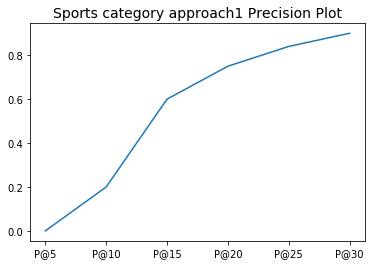

In [328]:
sports_data_approach1 = {'P@5': sports_precisionapproach1[0], 'P@10': sports_precisionapproach1[1], 
                         'P@15': sports_precisionapproach1[2], 'P@20': sports_precisionapproach1[3],
                         'P@25': sports_precisionapproach1[4],'P@30': sports_precisionapproach1[5]}

Precisionplotting(sports_data_approach1,categories[0]+' category approach1')

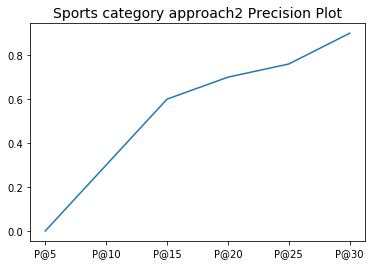

In [329]:
sports_data_approach2 = {'P@5': sports_precisionapproach2[0], 'P@10': sports_precisionapproach2[1], 
                         'P@15': sports_precisionapproach2[2], 'P@20': sports_precisionapproach2[3],
                         'P@25': sports_precisionapproach2[4],'P@30': sports_precisionapproach2[5]}

Precisionplotting(sports_data_approach2 ,categories[0]+' category approach2')

<a id=section503></a>
### For Science Category


### Precision Calculations by approach 1 - Query - Vaccine

In [330]:
science_precisionat5=Findprecision(5,'ResultantRanks_A1.txt',categories[1],'utf-8')
print("------------------Precision@5----------------------", science_precisionat5)

science_precisionat10=Findprecision(10,'ResultantRanks_A1.txt',categories[1],'utf-8')
print("------------------Precision@10----------------------", science_precisionat10)

science_precisionat15=Findprecision(15,'ResultantRanks_A1.txt',categories[1],'utf-8')
print("------------------Precision@15----------------------", science_precisionat15)

science_precisionat20=Findprecision(20,'ResultantRanks_A1.txt',categories[1],'utf-8')
print("------------------Precision@20----------------------", science_precisionat20)

science_precisionat25=Findprecision(25,'ResultantRanks_A1.txt',categories[1],'utf-8')
print("------------------Precision@25----------------------", science_precisionat25)

science_precisionat30=Findprecision(30,'ResultantRanks_A1.txt',categories[1],'utf-8')
print("------------------Precision@30----------------------", science_precisionat30)


science_precisionapproach1 = np.array([science_precisionat5,science_precisionat10,science_precisionat15,
                               science_precisionat20,science_precisionat25,science_precisionat30])

################################  Precision@5   #########################################
---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------
['Doc 2', '  Doc 5', ' Doc 18', ' Doc 16', ' Doc 19']
---------------------- Resultant Doucments from file: ResultantRanks_A1.txt-------------------
['Doc 20', ' Doc 19', ' Doc 18', ' Doc 17', ' Doc 16']
------------------Precision@5---------------------- 0.6
################################  Precision@10   #########################################
---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------
['Doc 2', '  Doc 5', ' Doc 18', ' Doc 16', ' Doc 19', '  Doc 3', '  Doc 1', '  Doc 7', ' Doc 10', ' Doc 12']
---------------------- Resultant Doucments from file: ResultantRanks_A1.txt-------------------
['Doc 20', ' Doc 19', ' Doc 18', ' Doc 17', ' Doc 16', ' Doc 15', ' Doc 14', ' Doc 13', ' Doc 12', ' Doc 11']
------------------Precision@10-------


### Precision Caluculation by approach 2 - Query "Vaccine"

In [334]:
science_precisionat5=Findprecision(5,'ResultantRanks_A2.txt',categories[1],'utf-8')
print("------------------Precision@5----------------------", science_precisionat5)

science_precisionat10=Findprecision(10,'ResultantRanks_A2.txt',categories[1],'utf-8')
print("------------------Precision@10----------------------", science_precisionat10)

science_precisionat15=Findprecision(15,'ResultantRanks_A2.txt',categories[1],'utf-8')
print("------------------Precision@15----------------------", science_precisionat15)

science_precisionat20=Findprecision(20,'ResultantRanks_A2.txt',categories[1],'utf-8')
print("------------------Precision@20----------------------", science_precisionat20)

science_precisionat25=Findprecision(25,'ResultantRanks_A2.txt',categories[1],'utf-8')
print("------------------Precision@25----------------------", science_precisionat25)

science_precisionat30=Findprecision(30,'ResultantRanks_A2.txt',categories[1],'utf-8')
print("------------------Precision@30----------------------", science_precisionat30)

science_precisionapproach2 = np.array([science_precisionat5,science_precisionat10,science_precisionat15,
                                       science_precisionat20,science_precisionat25,science_precisionat30])

################################  Precision@5   #########################################
---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------
['Doc 2', '  Doc 5', ' Doc 18', ' Doc 16', ' Doc 19']
---------------------- Resultant Doucments from file: ResultantRanks_A2.txt-------------------
['Doc 14', ' Doc 19', ' Doc 13', '  Doc 7', '  Doc 4']
------------------Precision@5---------------------- 0.2
################################  Precision@10   #########################################
---------------------- Resultant Doucments from Ground Truth file: RankedDocuments.txt ----------------
['Doc 2', '  Doc 5', ' Doc 18', ' Doc 16', ' Doc 19', '  Doc 3', '  Doc 1', '  Doc 7', ' Doc 10', ' Doc 12']
---------------------- Resultant Doucments from file: ResultantRanks_A2.txt-------------------
['Doc 14', ' Doc 19', ' Doc 13', '  Doc 7', '  Doc 4', '  Doc 1', ' Doc 11', ' Doc 16', ' Doc 12', '  Doc 5']
------------------Precision@10-------

<a id=section504></a>
### Plot the obtained results

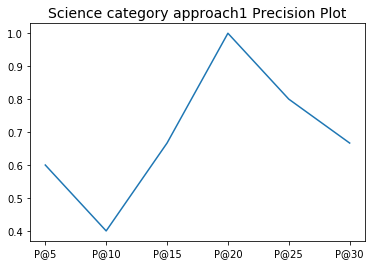

In [332]:
science_data_approach1 = {'P@5': science_precisionapproach1[0], 'P@10': science_precisionapproach1[1],
                          'P@15': science_precisionapproach1[2],'P@20': science_precisionapproach1[3],
                          'P@25': science_precisionapproach1[4],'P@30': science_precisionapproach1[5]}

Precisionplotting(science_data_approach1, categories[1]+' category approach1')

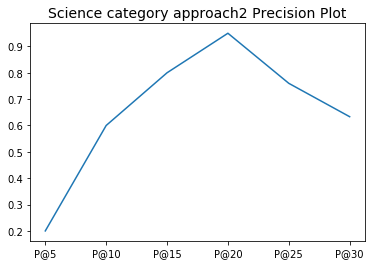

In [333]:
science_data_approach2 = {'P@5': science_precisionapproach2[0], 'P@10': science_precisionapproach2[1], 
                          'P@15': science_precisionapproach2[2],'P@20': science_precisionapproach2[3],
                          'P@25': science_precisionapproach2[4],'P@30': science_precisionapproach2[5]}

Precisionplotting(science_data_approach2,categories[1]+' category approach2')

 <a id=section6></a>
# Assumptions and Conclusions 


-- All Extracted documents are stored under /Data/Sports/ for sports category  with .csv file extension. </br>

-- All Extracted documents are stored under /Data/Science/ for sports category  with .csv file extension. </br>

-- Aggregated documents are stored under /Data/Sports/ for sports category  with .csv file extension. </br>

-- All Ranked documents are stored under /Data/Sports/Rank for sports category as ResultantRanks_A1.txt and ResultantRanks_A2.txt  </br>

-- Ground truth file is stored under /Data/Sports/Rank for sports category  as RankedDocuments.txt file extension. </br>

-- For better visibility can open .cvs (extracted news file) file using excel. </br>

-- For this assignment we have considered Sports and Science Categories. </br>

-- For Sports category date filter **Fri, 01 Jan 2021** is applied to extract news providing corpus in /Data/Sports folder. Results are valid for this date only. </br> 

-- For Science category date filter **Mon, 04 Jan 2021** is applied to extract news providing corpus in /Data/Science folder. Results are valid for this date only. </br>

-- As we have considered the Rss news feed from Google and Bing for the data extraction purpose, running the ExtractNews method again will override the Data folder and results may vary as feed varies from date to date. 
Accordingly RankedDocuments.txt should be constructed manually.


*************************************************** End of File **************************************